In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [20]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


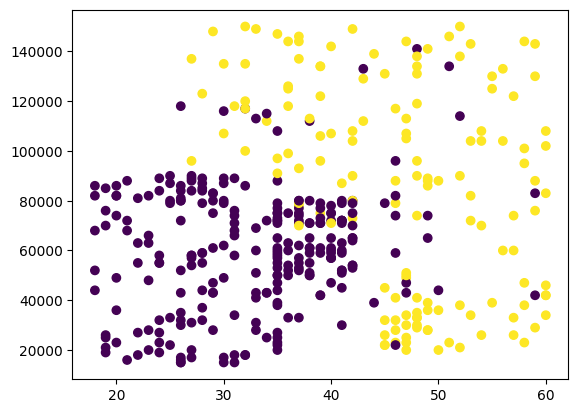

In [21]:
plt.scatter(x = df['Age'],y = df['EstimatedSalary'],c=df['Purchased'])

In [22]:
df = df.drop(columns = ['User ID','Gender'])

In [23]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [24]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Set parameters to 0
model.get_weights()

[array([[ 0.14016533, -0.16717434],
        [ 0.37649977,  0.68912804]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.05277765],
        [0.63212144]], dtype=float32),
 array([0.], dtype=float32)]

In [27]:
initial_weights = model.get_weights()

In [28]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [29]:
model.set_weights(initial_weights)

In [30]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2897 - loss: 21103.7852 - val_accuracy: 0.6375 - val_loss: 11316.6426
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2455 - loss: 21398.6074 - val_accuracy: 0.6375 - val_loss: 10861.4004
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2927 - loss: 19790.1426 - val_accuracy: 0.6375 - val_loss: 10425.8828
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3204 - loss: 17775.9434 - val_accuracy: 0.6375 - val_loss: 10002.1943
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2931 - loss: 18220.2930 - val_accuracy: 0.6375 - val_loss: 9584.6631
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2648 - loss: 18043.9805 - val_accuracy: 0.6375 - val_loss: 9178.1055
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2937 - loss: 16190.3906 - val_accuracy: 0.6375 - val_loss: 8794.1943
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accu

In [33]:
model.get_weights()

[array([[0.01327647, 0.01327647],
        [0.01412193, 0.01412193]], dtype=float32),
 array([0.01270719, 0.01270719], dtype=float32),
 array([[0.01411281],
        [0.01411281]], dtype=float32),
 array([-0.49463177], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

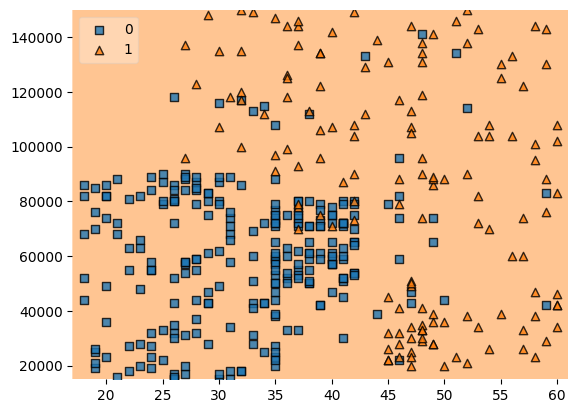

In [34]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)